In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [188]:


# URL
train = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# Define column names 
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
                'marital_status', 'occupation', 'relationship', 'race', 
                'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 
                'native_country', 'income']

# Read the datasets
train_df = pd.read_csv(train, names=columns, na_values='?',sep=',\s')
test_df = pd.read_csv(test, names=columns, na_values='?',skiprows = 1,sep=',\s')




C:\Users\gaind\AppData\Local\Temp\ipykernel_10532\3523091611.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_df = pd.read_csv(train, names=columns, na_values='?',sep=',\s')
C:\Users\gaind\AppData\Local\Temp\ipykernel_10532\3523091611.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_df = pd.read_csv(test, names=columns, na_values='?',skiprows = 1,sep=',\s')


In [189]:
#Read the dataset
train_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [190]:
#Read the dataset
test_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [191]:
print(train_df.dtypes,"\n\n",test_df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object 

 age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [192]:
#Merge the datasets
data_merge = pd.concat([train_df,test_df])
data_merge

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [193]:
#Check for unique data
data_merge.nunique()

age                  74
workclass             8
fnlwgt            28523
education            16
education_num        16
marital_status        7
occupation           14
relationship          6
race                  5
sex                   2
capital_gain        123
capital_loss         99
hours_per_week       96
native_country       41
income                4
dtype: int64

In [194]:
# check unique values in each columns
for column in data_merge:
    print(column)
    print(data_merge[column].unique())
    print('\n')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']


fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]


education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


education_num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital_status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' na

In [195]:
# replace values
data_merge["income"].value_counts()


income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [196]:
data_merge['income'] = data_merge['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})


In [197]:
# Re-check unique values in each columns
for column in data_merge:
    print(column)
    print(data_merge[column].unique())
    print('\n')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']


fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]


education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


education_num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


marital_status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' na

In [198]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [199]:
# Find null values in the dataset
null = data_merge.isnull().sum()

# Coloum name with null count
print("Columns with null values and their counts:")
print(null[null > 0])

# Total null
total_null = null.sum()
print("Total null values in the dataset:", total_null)

Columns with null values and their counts:
workclass         2799
occupation        2809
native_country     857
dtype: int64
Total null values in the dataset: 6465


In [200]:
# Drop null values
data_merge.dropna(inplace=True)

In [201]:
#Check if null values exists
null_values = data_merge.isnull().sum()
print("Columns with null values and their counts:")
print(null_values[null_values > 0])
total_null_values = null_values.sum()
print("Total null values in the dataset:", total_null_values)

Columns with null values and their counts:
Series([], dtype: int64)
Total null values in the dataset: 0


In [202]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education_num   45222 non-null  int64 
 5   marital_status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capital_gain    45222 non-null  int64 
 11  capital_loss    45222 non-null  int64 
 12  hours_per_week  45222 non-null  int64 
 13  native_country  45222 non-null  object
 14  income          45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [203]:
#Drop diplicates
print (data_merge.duplicated().sum())
data_merge = data_merge.drop_duplicates()

47


In [204]:
#check if duplicates are dropped
print (data_merge.duplicated().sum())

0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education_num'}>,
        <Axes: title={'center': 'capital_gain'}>],
       [<Axes: title={'center': 'capital_loss'}>,
        <Axes: title={'center': 'hours_per_week'}>]], dtype=object)

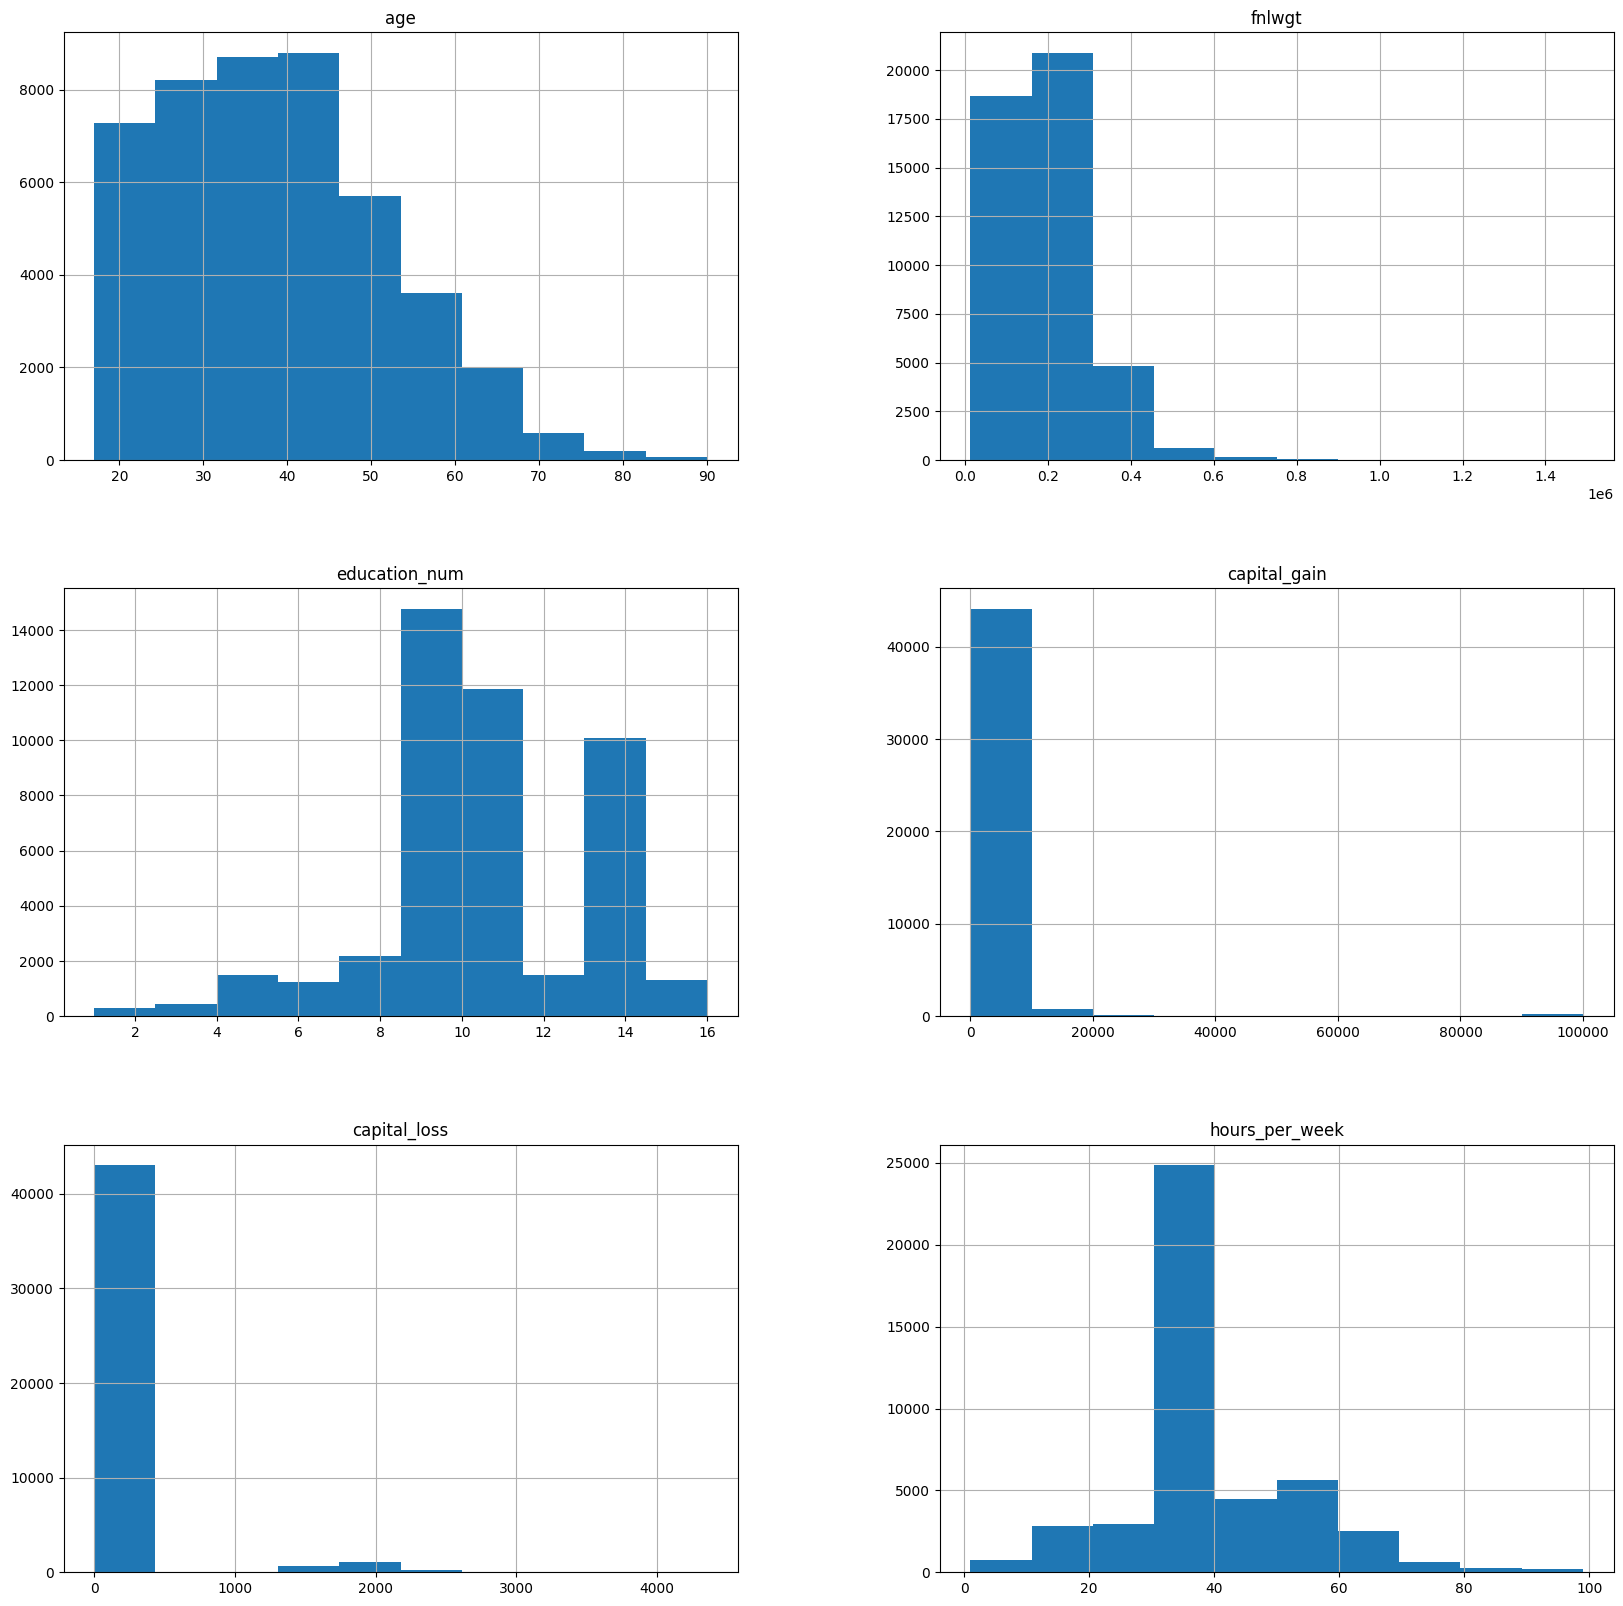

In [205]:
data_merge.hist(figsize=(20, 20))

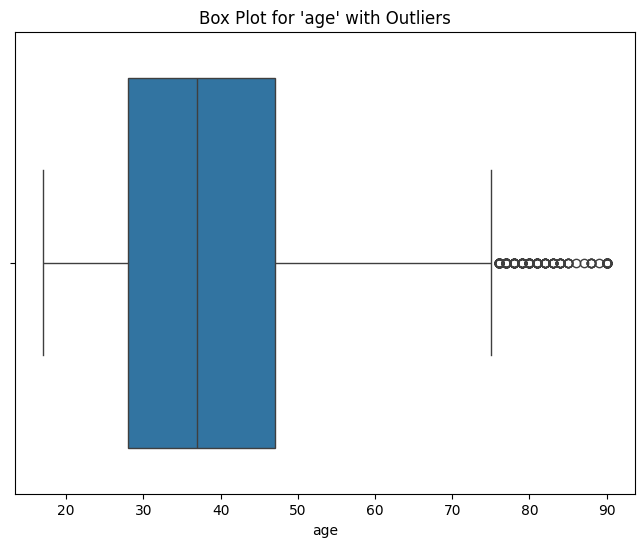

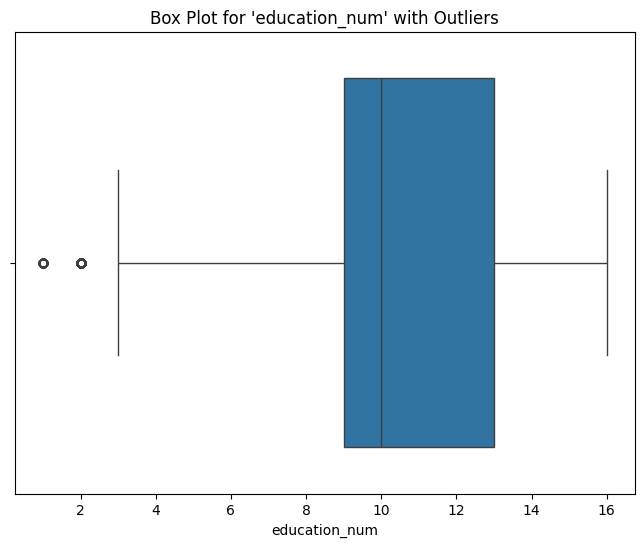

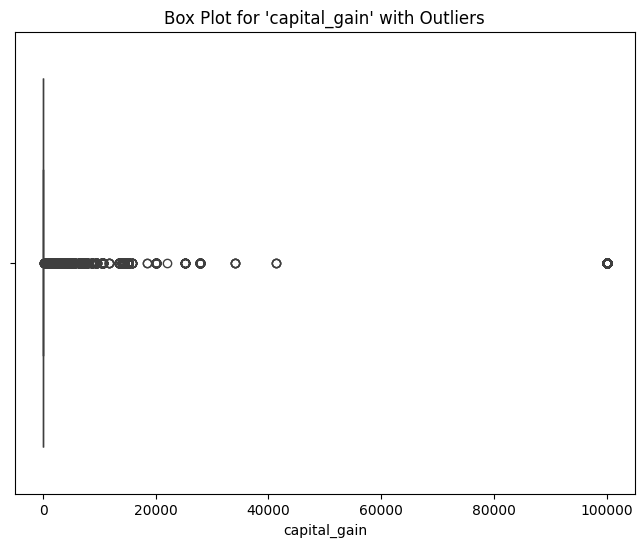

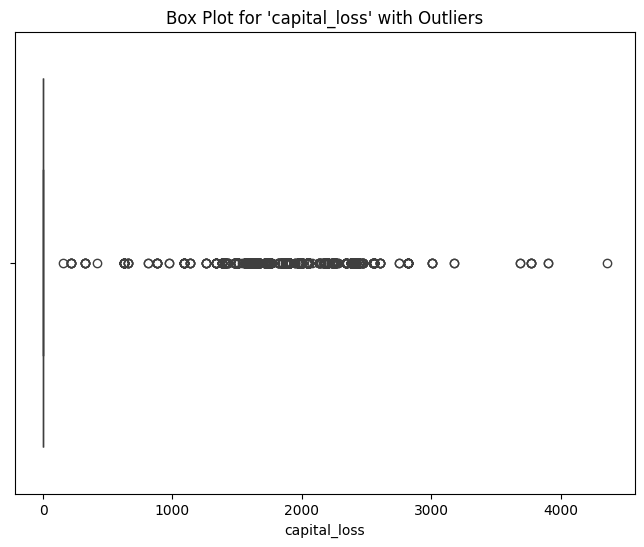

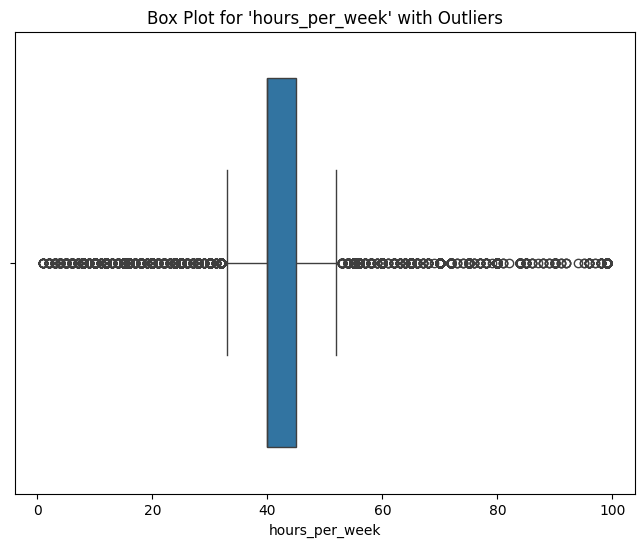

In [206]:
#Check for outliers


num_vals = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

def outliers(data, column):
    outliers = {}
    for col in column:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        low = Q1 - 1.5 * IQR
        up= Q3 + 1.5 * IQR
        outlier = data[(data[col] < low) | (data[col] > up)].index
        outliers[col] = outlier
    return outliers


# Detect outliers
outlier = outliers(data_merge, num_vals)

# Visualize outliers using box plots
for col, indices in outlier.items():
    if len(indices) > 0:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data_merge[col])
        plt.title("Box Plot for '{}' with Outliers".format(col))
        plt.show()

In [207]:
#Grouping
#incase accuracy gets low

In [208]:
#label encode (convertibg onjects into integers)

le = LabelEncoder()
data_merge['workclass'] = le.fit_transform(data_merge['workclass'])
data_merge['education'] = le.fit_transform(data_merge['education'])
data_merge['marital_status'] = le.fit_transform(data_merge['marital_status'])
data_merge['occupation'] = le.fit_transform(data_merge['occupation'])
data_merge['relationship'] = le.fit_transform(data_merge['relationship'])
data_merge['race'] = le.fit_transform(data_merge['race'])
data_merge['sex'] = le.fit_transform(data_merge['sex'])
data_merge['hours_per_week'] = le.fit_transform(data_merge['hours_per_week'])
data_merge['native_country'] = le.fit_transform(data_merge['native_country'])
data_merge['income'] = le.fit_transform(data_merge['income'])

data_merge.head()

C:\Users\gaind\AppData\Local\Temp\ipykernel_10532\2011729264.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merge['workclass'] = le.fit_transform(data_merge['workclass'])
C:\Users\gaind\AppData\Local\Temp\ipykernel_10532\2011729264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merge['education'] = le.fit_transform(data_merge['education'])
C:\Users\gaind\AppData\Local\Temp\ipykernel_10532\2011729264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,39,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,12,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,39,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,39,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,39,4,0


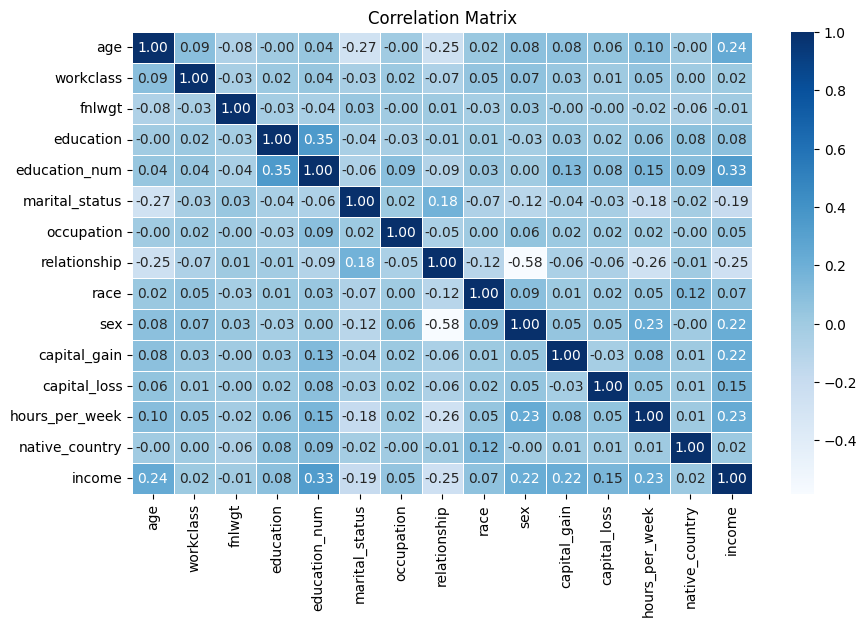

In [209]:
#Correlation matrix
corr_matrix = data_merge.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [210]:
#drop fnlwgt
data_merge = data_merge.drop(["fnlwgt"],axis = 1)
data_merge.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,5,9,13,4,0,1,4,1,2174,0,39,38,0
1,50,4,9,13,2,3,0,4,1,0,0,12,38,0
2,38,2,11,9,0,5,1,4,1,0,0,39,38,0
3,53,2,1,7,2,5,0,2,1,0,0,39,38,0
4,28,2,9,13,2,9,5,2,0,0,0,39,4,0


In [211]:
data_merge.shape

(45175, 14)

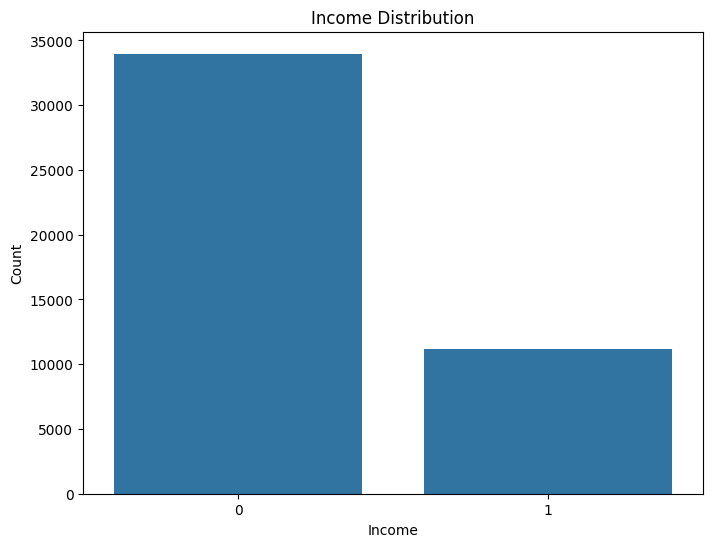

In [212]:
# distribution of 'income' column
plt.figure(figsize=(8, 6))
sns.countplot(data=data_merge, x='income')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


In [213]:
#balancing dataset

# occurrences of each income category
income_counts = data_merge['income'].value_counts()
print("Before Oversampling:", income_counts)

X = data_merge.drop(columns=['income'])
y = data_merge['income']
smote = SMOTE(random_state=42)

# oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# class distribution after oversampling
print("After Oversampling:", Counter(y_resampled))

# DataFrame with balanced data
balanceIncome = pd.DataFrame(X_resampled, columns=X.columns)
balanceIncome['income'] = y_resampled

Before Oversampling: income
0    33973
1    11202
Name: count, dtype: int64
After Oversampling: Counter({0: 33973, 1: 33973})


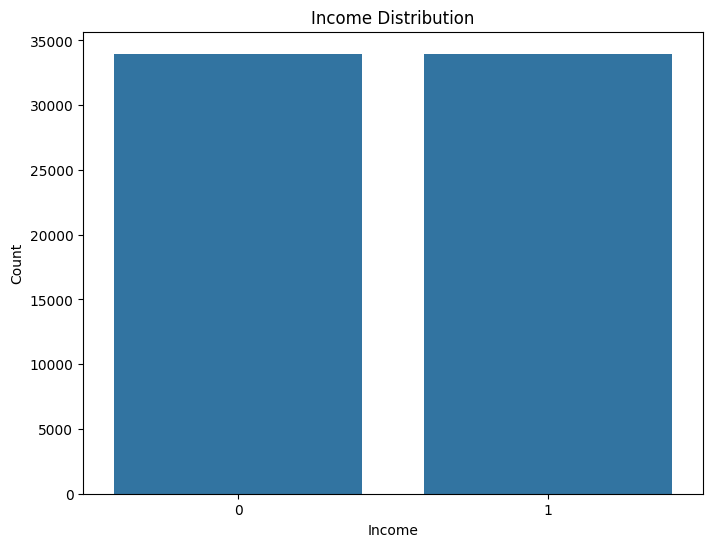

In [214]:
# distribution of 'income' column after oversampling
plt.figure(figsize=(8, 6))
sns.countplot(data=balanceIncome, x='income')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

Accuracy: 0.8844002943340692

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      6746
           1       0.87      0.90      0.89      6844

    accuracy                           0.88     13590
   macro avg       0.88      0.88      0.88     13590
weighted avg       0.88      0.88      0.88     13590


Confusion Matrix:
[[6290  456]
 [3816 3028]]


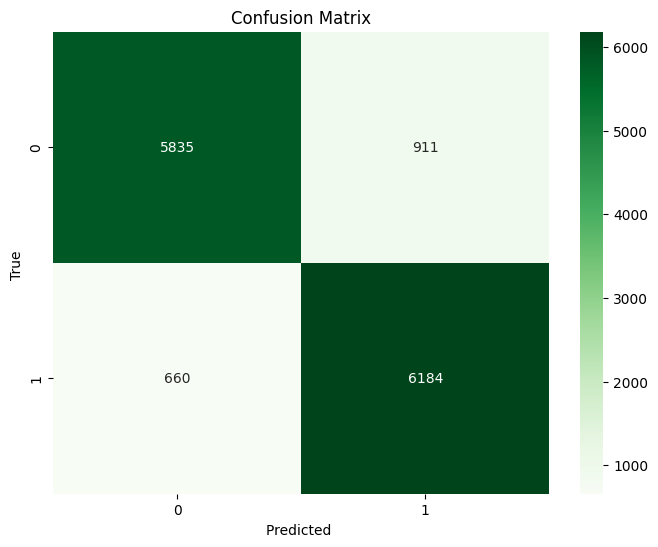

In [215]:
#Using random forest

X = balanceIncome.drop(columns=['income'])
y = balanceIncome['income']

#  train and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
forest_classifier = RandomForestClassifier(random_state=42)
forest_classifier.fit(X_train, y_train)

# labels for the test set
y_pred = forest_classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
confus_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confus_matrix, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted ')
plt.ylabel('True ')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.6856512141280353
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.93      0.75      6746
           1       0.87      0.44      0.59      6844

    accuracy                           0.69     13590
   macro avg       0.75      0.69      0.67     13590
weighted avg       0.75      0.69      0.67     13590


Confusion Matrix:
[[6290  456]
 [3816 3028]]


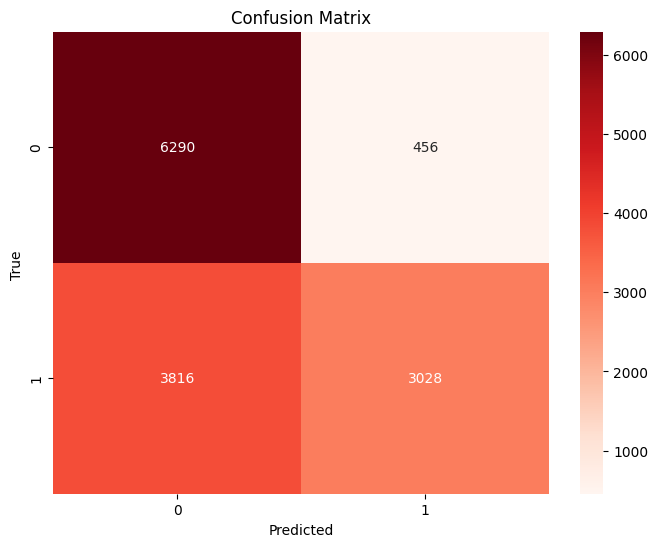

In [216]:
#Using Naïve Bayes

X = balanceIncome.drop(columns=['income'])
y = balanceIncome['income']

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Naïve Bayes classifier
Bayes_classifier = GaussianNB()
Bayes_classifier.fit(X_train, y_train)

# labels for test set
y_pred = Bayes_classifier.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
confus_matrix = confusion_matrix(y_test, y_pred)
print(confus_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confus_matrix, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True ')
plt.title('Confusion Matrix')
plt.show()